# Load packages, data, and models

In [1]:
import pickle
import train
import math
import build_features
import importlib as imp
import numpy as np
import pandas as pd
import time
import os
import zscore
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import metrics
from dateutil.relativedelta import relativedelta
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# DATA DICTIONARIES NEED FOR ANALYSES AND PLOTS
d1 = pickle.load(open('../python objects/patientdata_20170823.pkl', 'rb'))
d1mom = pickle.load(open('../python objects/patient_mother_data_20170724.pkl', 'rb'))
lat_lon_dic = pickle.load(open('../python objects/lat_lon_data_20180329.pkl', 'rb'))
env_dic= pickle.load(open('../python objects/census_data_20170920.pkl', 'rb'))
d1mom_hist = pickle.load(open('../python objects/full_lutheran_mother_data.pkl', 'rb'))

In [3]:
auc_list_6 = pickle.load(open('../../out6/auc_list.pkl', 'rb'))
auc_list_12 = pickle.load(open('../../out12/auc_list.pkl', 'rb'))
auc_list_18 = pickle.load(open('../../out18/auc_list.pkl', 'rb'))
auc_list_24 = pickle.load(open('../../out24/auc_list.pkl', 'rb'))
auc_list_36 = pickle.load(open('../../out36/auc_list.pkl', 'rb'))
auc_list_48 = pickle.load(open('../../out48/auc_list.pkl', 'rb'))
auc_list = auc_list_6 + auc_list_12 + auc_list_18 + auc_list_24 + auc_list_36 + auc_list_48

titles_total_6 = pickle.load(open('../../out6/titles_total.pkl', 'rb'))
titles_total_12 = pickle.load(open('../../out12/titles_total.pkl', 'rb'),)
titles_total_18 = pickle.load(open('../../out18/titles_total.pkl', 'rb'))
titles_total_24 = pickle.load(open('../../out24/titles_total.pkl', 'rb'))
titles_total_36 = pickle.load(open('../../out36/titles_total.pkl', 'rb'))
titles_total_48 = pickle.load(open('../../out48/titles_total.pkl', 'rb'))
titles_total = titles_total_6 + titles_total_12 + titles_total_18 + titles_total_24 + titles_total_36 + titles_total_48

prec_total_6 = pickle.load(open('../../out6/prec_total.pkl', 'rb'))
prec_total_12 = pickle.load(open('../../out12/prec_total.pkl', 'rb'))
prec_total_18 = pickle.load(open('../../out18/prec_total.pkl', 'rb'))
prec_total_24 = pickle.load(open('../../out24/prec_total.pkl', 'rb'))
prec_total_36 = pickle.load(open('../../out36/prec_total.pkl', 'rb'),)
prec_total_48 = pickle.load(open('../../out48/prec_total.pkl', 'rb'))
prec_total = prec_total_6 + prec_total_12 + prec_total_18 + prec_total_24 + prec_total_36 + prec_total_48

recall_total_6 = pickle.load(open('../../out6/recall_total.pkl', 'rb'))
recall_total_18 = pickle.load(open('../../out18/recall_total.pkl', 'rb'))
recall_total_12 = pickle.load(open('../../out12/recall_total.pkl', 'rb'))
recall_total_24 = pickle.load(open('../../out24/recall_total.pkl', 'rb'))
recall_total_36 = pickle.load(open('../../out36/recall_total.pkl', 'rb'))
recall_total_48 = pickle.load(open('../../out48/recall_total.pkl', 'rb'))
recall_total = recall_total_6 + recall_total_12 + recall_total_18 + recall_total_24 + recall_total_36 + recall_total_48

spec_total_6 = pickle.load(open('../../out6/spec_total.pkl', 'rb'))
spec_total_18 = pickle.load(open('../../out18/spec_total.pkl', 'rb'))
spec_total_12 = pickle.load(open('../../out12/spec_total.pkl', 'rb'))
spec_total_24 = pickle.load(open('../../out24/spec_total.pkl', 'rb'))
spec_total_36 = pickle.load(open('../../out36/spec_total.pkl', 'rb'))
spec_total_48 = pickle.load(open('../../out48/spec_total.pkl', 'rb'))
spec_total = spec_total_6 + spec_total_12 + spec_total_18 + spec_total_24 + spec_total_36 + spec_total_48

model_list_6 = pickle.load(open('../../out6/model_list.pkl', 'rb'))
model_list_12 = pickle.load(open('../../out12/model_list.pkl', 'rb'))
model_list_18 = pickle.load(open('../../out18/model_list.pkl', 'rb'))
model_list_24 = pickle.load(open('../../out24/model_list.pkl', 'rb'))
model_list_36 = pickle.load(open('../../out36/model_list.pkl', 'rb'))
model_list_48 = pickle.load(open('../../out48/model_list.pkl', 'rb'))
model_list = model_list_6 + model_list_12 + model_list_18 + model_list_24 + model_list_36 + model_list_48

# TOP PERFORMING MODEL DATASETS (SHOULD BE SAME AS ANY OTHER, BUT TRAIN/TEST SPLITS ARE LIKELY DIFFERENT)
boys6 = np.load('../../out6/data_transformed_randomforest_boys_maternal_no_exclusion_6_months.npz')
girls6 = np.load('../../out6/data_transformed_lasso_girls_maternal_no_exclusion_6_months.npz')
boys12 = np.load('../../out12/data_transformed_gradientboost_boys_maternal_no_exclusion_12_months.npz')
girls12 = np.load('../../out12/data_transformed_randomforest_girls_maternal_no_exclusion_12_months.npz')
boys18 = np.load('../../out18/data_transformed_gradientboost_boys_maternal_no_exclusion_18_months.npz')
girls18 = np.load('../../out18/data_transformed_randomforest_girls_maternal_no_exclusion_18_months.npz')
boys24 = np.load('../../out24/data_transformed_gradientboost_boys_maternal_no_exclusion_24_months.npz')
girls24 = np.load('../../out24/data_transformed_gradientboost_girls_maternal_no_exclusion_24_months.npz')
boys36 = np.load('../../out36/data_transformed_lasso_boys_maternal_no_exclusion_36_months.npz')
girls36 = np.load('../../out36/data_transformed_lasso_girls_maternal_no_exclusion_36_months.npz')
boys48 = np.load('../../out48/data_transformed_gradientboost_boys_maternal_no_exclusion_48_months.npz')
girls48 = np.load('../../out48/data_transformed_lasso_girls_maternal_no_exclusion_48_months.npz')

In [4]:
agex_low = 4.5
agex_high = 5.5
months_from = 0
months_to = 24

x1,y1,y1label,feature_headers,mrns = build_features.call_build_function(d1, d1mom, d1mom_hist, lat_lon_dic, env_dic, 
    agex_low, agex_high, months_from, months_to, False, prediction='obese')


Processing 52,945 patients: 52945it [03:30, 252.03it/s]  


In [5]:
x2_boys, y2_boys, y2label_boys, mrns2_boys, ix_filter_boys, feature_headers2_boys = train.prepare_data_for_analysis({}, {}, {}, {}, {},
    x1, y1, y1label, feature_headers, mrns, agex_low, agex_high, months_from, months_to,
    filterSTR=['Gender:0'], variablesubset=[],do_impute=False, do_normalize=True, min_occur=0, feature_info=False, delay_print=False)


Using pre-prepared data

Original cohort size is: 52945 num features: 19288
total number of people who have:  ['Gender:0 male']  is: 5775
total number of people who have a BMI measured: 11484
total number of people who have all filtered variables: 5775
total number of people who have maternal data available: 3451
intersection of the three above is: 1751
1751 patients selected..


/Volumes/CPO/ObesityPY/src/train.py:201: RuntimeWarning: Mean of empty slice
  mu = np.nanmean(xcop, axis=0)
/Users/hammor01/anaconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1434: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/hammor01/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/hammor01/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


18815
corr matrix is filtered to size: (19288, 18815)
output is: average: 16.875, min: 11.260, max: 30.480
total patients: 1,751, positive: 386.00, negative: 1,365.00
normalizing output...
Using pre-prepared data
5094 features are binary
Predicting BMI at age: 4.5 to 5.5 years, from data in ages: 0 - 24 months
filtering patients with: ['Gender:0']
total size: 1,751


In [6]:
x2_boys.shape, len(feature_headers2_boys), y2_boys.shape, y2label_boys.shape, mrns2_boys.shape

((1751, 19288), 19288, (1751,), (1751,), (1751,))

In [7]:
x2_girls, y2_girls, y2label_girls, mrns2_girls, ix_filter_girls, feature_headers2_girls = train.prepare_data_for_analysis({}, {}, {}, {}, {},
    x1, y1, y1label, feature_headers, mrns, agex_low, agex_high, months_from, months_to,
    filterSTR=['Gender:1'], variablesubset=[], do_impute=False, do_normalize=True, min_occur=0, feature_info=False, delay_print=False)


Using pre-prepared data

Original cohort size is: 52945 num features: 19288
total number of people who have:  ['Gender:1 female']  is: 5719
total number of people who have a BMI measured: 11484
total number of people who have all filtered variables: 5719
total number of people who have maternal data available: 3451
intersection of the three above is: 1698
1698 patients selected..


/Volumes/CPO/ObesityPY/src/train.py:201: RuntimeWarning: Mean of empty slice
  mu = np.nanmean(xcop, axis=0)
/Users/hammor01/anaconda3/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1434: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/hammor01/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/hammor01/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


18815
corr matrix is filtered to size: (19288, 18815)
output is: average: 16.487, min: 10.470, max: 35.320
total patients: 1,698, positive: 256.00, negative: 1,442.00
normalizing output...
Using pre-prepared data
5094 features are binary
Predicting BMI at age: 4.5 to 5.5 years, from data in ages: 0 - 24 months
filtering patients with: ['Gender:1']
total size: 1,698


In [8]:
x2_girls.shape, len(feature_headers2_girls), y2_girls.shape, y2label_girls.shape, mrns2_girls.shape

((1698, 19288), 19288, (1698,), (1698,), (1698,))

In [9]:
ix_filter = np.array([ixb or ixg for ixb,ixg in zip(ix_filter_boys, ix_filter_girls)])
x = x1[ix_filter,:]
y = y1[ix_filter]
ylabel = y1label[ix_filter]
print(x.shape, y.shape, ylabel.shape, len(feature_headers))
train.get_stat_table(x, y, ylabel, feature_headers, folder='../summary_statistics')

(3449, 19288) (3449,) (3449,) 19288


/Volumes/CPO/ObesityPY/src/train.py:1068: RuntimeWarning: Mean of empty slice.
  md = x[ix_total_pos,:][:,col_ix].mean() - x[ix_total_neg,:][:,col_ix].mean()
/Users/hammor01/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3194: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)


In [10]:
# GET ALL THE LABELS FOR OBESE/NOT OBESE CATEGORIES
boys_bmi, boys_pct, boys_labels = build_features.get_final_bmi(d1, agex_low, agex_high, mrnsForFilter=mrns2_boys)
girls_bmi, girls_pct, girls_labels = build_features.get_final_bmi(d1, agex_low, agex_high, mrnsForFilter=mrns2_girls)
boys_bmi_latest, boys_pct_latest, boys_labels_latest = build_features.get_latest_reading(d1, months_from, months_to, mrnsForFilter=mrns2_boys, zero_filter=False)
girls_bmi_latest, girls_pct_latest, girls_labels_latest = build_features.get_latest_reading(d1, months_from, months_to, mrnsForFilter=mrns2_girls, zero_filter=False)

boys_bmi_latest = boys_bmi_latest[ix_filter_boys,:]
boys_pct_latest = boys_pct_latest[ix_filter_boys]
boys_labels_latest = boys_labels_latest[ix_filter_boys]
girls_bmi_latest = girls_bmi_latest[ix_filter_girls,:]
girls_pct_latest = girls_pct_latest[ix_filter_girls]
girls_labels_latest = girls_labels_latest[ix_filter_girls]

In [11]:
boys_pct = boys_pct[boys_pct>0]
girls_pct = girls_pct[girls_pct>0]
print(boys_pct.shape, boys_pct_latest.shape, girls_pct.shape, girls_pct_latest.shape)

boys_labels = boys_labels[boys_labels != '']
girls_labels = girls_labels[girls_labels != '']
print(boys_labels.shape, boys_labels_latest.shape, girls_labels.shape, girls_labels_latest.shape)

(1751,) (1751,) (1698,) (1698,)
(1751,) (1751,) (1698,) (1698,)


In [12]:
boys_of = np.array([any(x==val for val in ('obese','class I severe obesity','class II severe obesity')) for x in boys_labels])
boys_under = boys_labels[boys_labels=='underweight']
boys_normal = boys_labels[boys_labels=='normal']
boys_over = boys_labels[boys_labels=='overweight']
boys_obese = boys_labels[boys_of]
boys_c1 = boys_labels[boys_labels=='class I severe obesity']
boys_c2 = boys_labels[boys_labels=='class II severe obesity']
boys = [boys_under, boys_normal, boys_over, boys_obese, boys_c1, boys_c2]
boys_nums = [x.shape[0] for x in boys]
boys_under.shape, boys_normal.shape, boys_over.shape, boys_obese.shape, boys_c1.shape, boys_c2.shape

((34,), (1038,), (293,), (386,), (61,), (16,))

In [13]:
boys_of_latest = np.array([any(x==val for val in ('obese','class I severe obesity','class II severe obesity')) for x in boys_labels_latest])
boys_under_latest = boys_labels_latest[boys_labels_latest=='underweight']
boys_normal_latest = boys_labels_latest[boys_labels_latest=='normal']
boys_over_latest = boys_labels_latest[boys_labels_latest=='overweight']
boys_obese_latest = boys_labels_latest[boys_of_latest]
boys_c1_latest = boys_labels_latest[boys_labels_latest=='class I severe obesity']
boys_c2_latest = boys_labels_latest[boys_labels_latest=='class II severe obesity']
boys_latest = [boys_under_latest, boys_normal_latest, boys_over_latest, boys_obese_latest, boys_c1_latest, boys_c2_latest]
boys_nums_latest = [x.shape[0] for x in boys_latest]
boys_under_latest.shape, boys_normal_latest.shape, boys_over_latest.shape, boys_obese_latest.shape, boys_c1_latest.shape, boys_c2_latest.shape

((22,), (867,), (333,), (453,), (20,), (0,))

In [14]:
girls_of = np.array([any(x==val for val in ('obese','class I severe obesity','class II severe obesity')) for x in girls_labels])
girls_under = girls_labels[girls_labels=='underweight']
girls_normal = girls_labels[girls_labels=='normal']
girls_over = girls_labels[girls_labels=='overweight']
girls_obese = girls_labels[girls_of]
girls_c1 = girls_labels[girls_labels=='class I severe obesity']
girls_c2 = girls_labels[girls_labels=='class II severe obesity']
girls = [girls_under, girls_normal, girls_over, girls_obese, girls_c1, girls_c2]
girls_nums = [x.shape[0] for x in girls]
girls_under.shape, girls_normal.shape, girls_over.shape, girls_obese.shape, girls_c1.shape, girls_c2.shape

((37,), (1096,), (309,), (256,), (32,), (10,))

In [15]:
girls_of_latest = np.array([any(x==val for val in ('obese','class I severe obesity','class II severe obesity')) for x in girls_labels_latest])
girls_under_latest = girls_labels_latest[girls_labels_latest=='underweight']
girls_normal_latest = girls_labels_latest[girls_labels_latest=='normal']
girls_over_latest = girls_labels_latest[girls_labels_latest=='overweight']
girls_obese_latest = girls_labels_latest[girls_of_latest]
girls_c1_latest = girls_labels_latest[girls_labels_latest=='class I severe obesity']
girls_c2_latest = girls_labels_latest[girls_labels_latest=='class II severe obesity']
girls_latest = [girls_under_latest, girls_normal_latest, girls_over_latest, girls_obese_latest, girls_c1_latest, girls_c2_latest]
girls_nums_latest = [x.shape[0] for x in girls_latest]
girls_under.shape, girls_normal_latest.shape, girls_over_latest.shape, girls_obese_latest.shape, girls_c1_latest.shape, girls_c2_latest.shape

((37,), (918,), (332,), (355,), (30,), (0,))

In [16]:
bins = [0.001,0.01,0.03,0.05,0.10,0.15,0.25,0.50,0.75,0.85,0.90,0.95,0.97,0.99,0.999,1.]
bin_names = ['0.0 - 0.001','0.001 - 0.01','0.01 - 0.03','0.03 - 0.05','0.05 - 0.1','0.1 - 0.15'
             ,'0.15 - 0.25','0.25 - 0.5','0.5 - 0.75','0.75 - 0.85','0.85 - 0.9','0.9 - 0.95',
             '0.95 - 0.97','0.97 - 0.99','0.99 - 0.999','0.999 - 1.0']

# bin_names = ['0 - 0.1','0.1 - 1','1 - 3','3 - 5','5 - 10','10 - 15'
#              ,'15 - 25','25 - 50','50 - 75','75 - 85','85 - 90','90 - 95',
#              '95 - 97','97 - 99','99 - 99.9','99.9 - 100']

boys_bins = np.bincount(np.digitize(boys_pct, bins, right=False))
girls_bins = np.bincount(np.digitize(girls_pct, bins, right=False))
print(bins)
print(boys_bins)
print(girls_bins)

[0.001, 0.01, 0.03, 0.05, 0.1, 0.15, 0.25, 0.5, 0.75, 0.85, 0.9, 0.95, 0.97, 0.99, 0.999, 1.0]
[  3   5  12  14  27  42  68 256 417 228 123 170  84 126 109  67]
[  3   5  15  14  33  28  80 264 432 259 148 161  79 103  71   3]


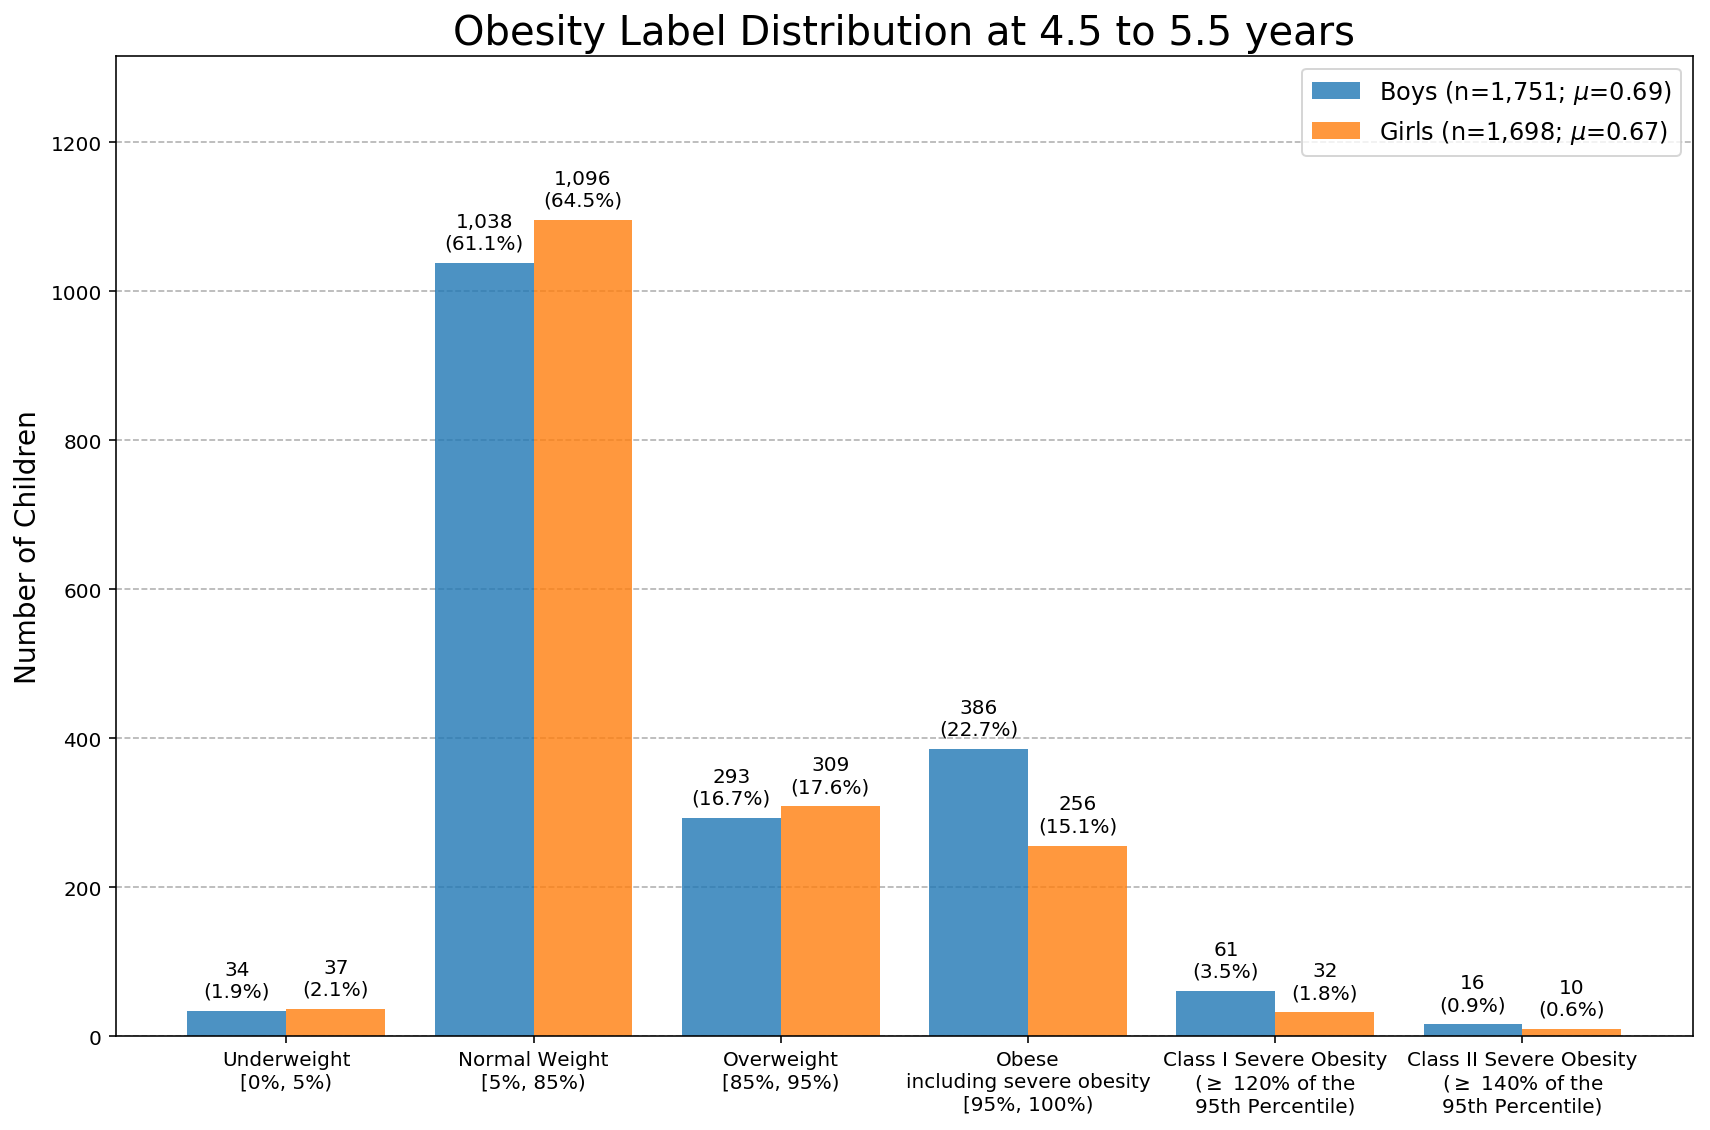

In [17]:
fig, ax = plt.subplots(figsize=(12,8))
index = np.arange(len(bins))
bar_width = 0.4
opacity = 0.8

labels = ['Underweight\n[0%, 5%)', 'Normal Weight\n[5%, 85%)', 'Overweight\n[85%, 95%)', \
         'Obese\nincluding severe obesity\n[95%, 100%)', 'Class I Severe Obesity\n($\geq$ 120% of the\n95th Percentile)', \
         'Class II Severe Obesity\n($\geq$ 140% of the\n95th Percentile)']
index = np.arange(len(labels))
bar1 = plt.bar(index, boys_nums, bar_width, alpha=opacity,
               label='Boys (n={0:,.0f}; $\mu$={1:,.2f})'.format(np.count_nonzero(boys_pct), np.mean(boys_pct)))
 
bar2 = plt.bar(index + bar_width, girls_nums, bar_width, alpha=opacity,
               label='Girls (n={0:,.0f}; $\mu$={1:,.2f})'.format(np.count_nonzero(girls_pct), np.mean(girls_pct)))

# for ix, (b, g) in enumerate(zip(boys_nums, girls_nums)):
#     plt.text()
rects = ax.patches
for i,rect in enumerate(rects):
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 5
    pct = y_value / np.count_nonzero(boys_pct) * 100 if i%2==0 else y_value / np.count_nonzero(girls_pct) * 100
    label = "{0:,.0f}\n({1:2.1f}%)".format(y_value, pct)
    plt.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')   
    
plt.ylim(0,np.max(np.hstack((np.array(boys_nums).ravel(),np.array(girls_nums).ravel())))*1.2)
plt.ylabel('Number of Children', fontsize=14)
plt.title('Obesity Label Distribution at 4.5 to 5.5 years', fontsize=20)
plt.xticks(index+0.2, labels)
ax.yaxis.grid(linestyle='--')
ax.set_axisbelow(True)
plt.legend(fontsize=12)
 
plt.tight_layout()
plt.savefig('../paper_figures/obesity_label_distribution.png', dpi=120)
plt.show()


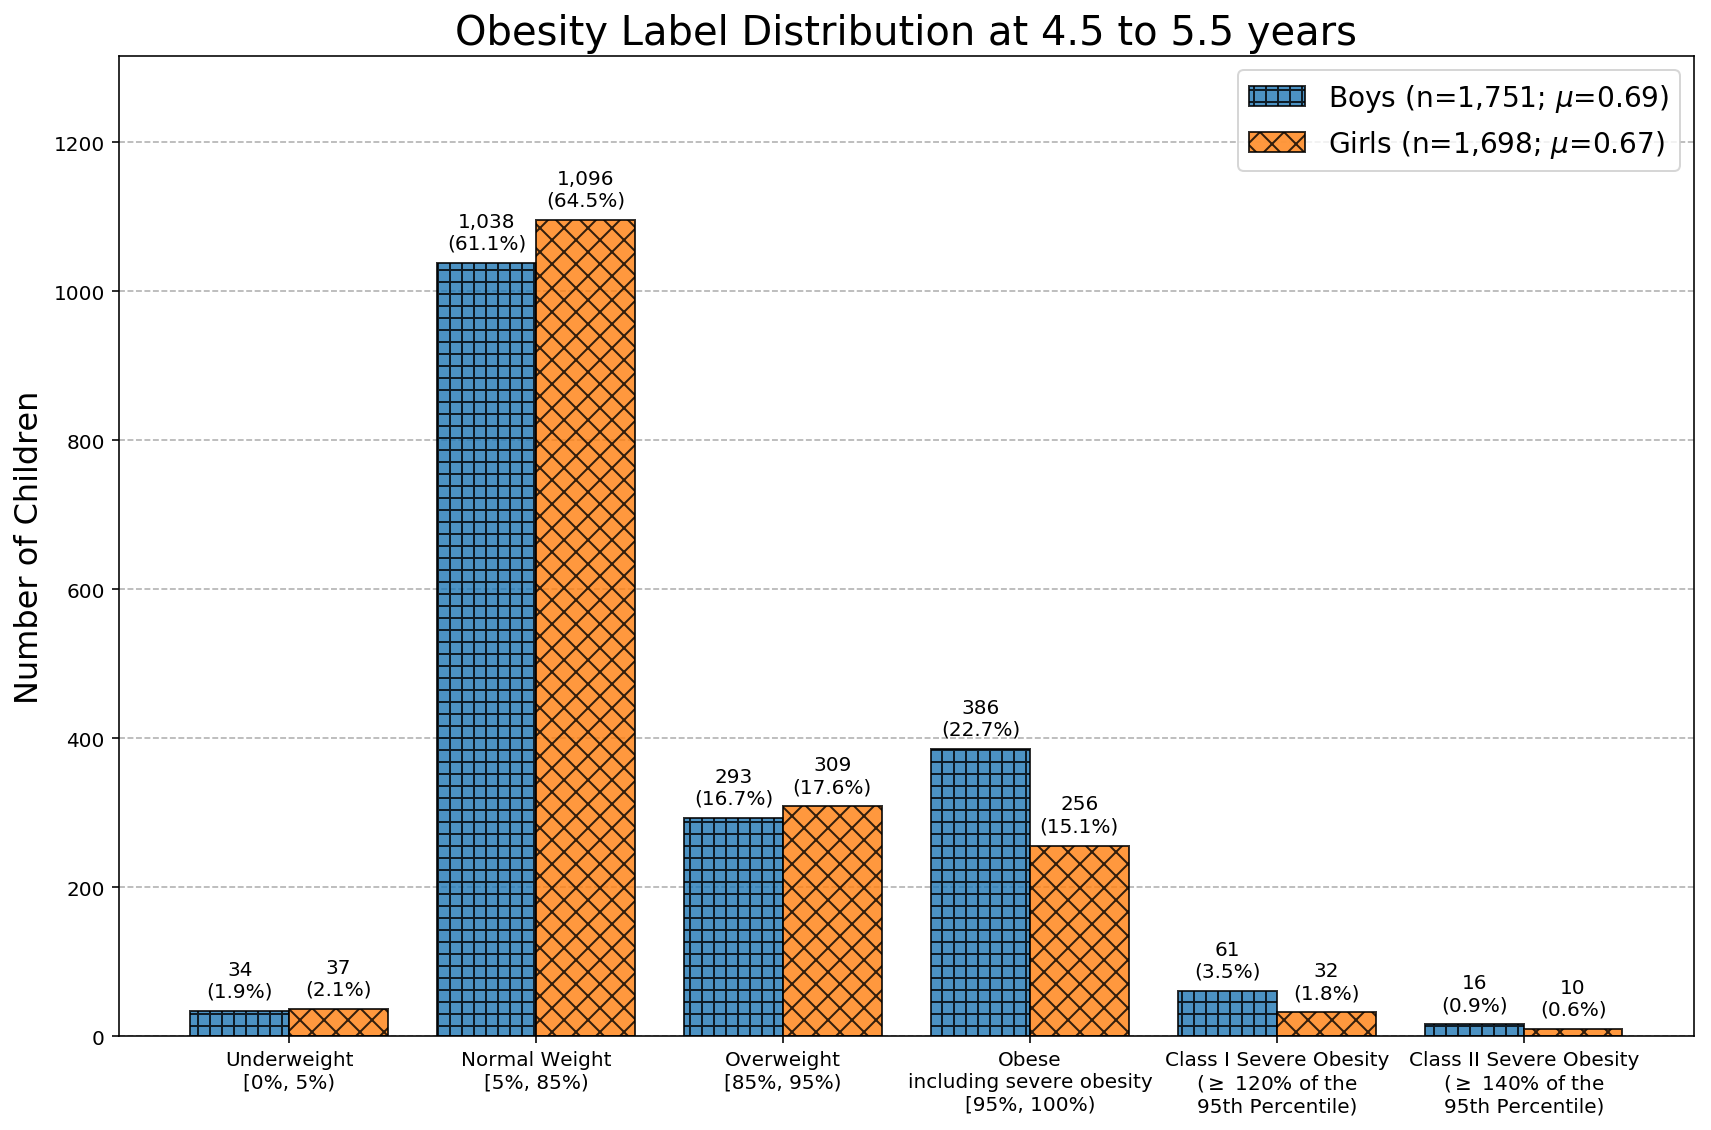

In [18]:
fig, ax = plt.subplots(figsize=(12,8))
index = np.arange(len(bins))
bar_width = 0.4
opacity = 0.8

labels = ['Underweight\n[0%, 5%)', 'Normal Weight\n[5%, 85%)', 'Overweight\n[85%, 95%)', \
         'Obese\nincluding severe obesity\n[95%, 100%)', 'Class I Severe Obesity\n($\geq$ 120% of the\n95th Percentile)', \
         'Class II Severe Obesity\n($\geq$ 140% of the\n95th Percentile)']
index = np.arange(len(labels))
bar1 = plt.bar(index, boys_nums, bar_width, alpha=opacity, hatch=2*'+', edgecolor='black',
               label='Boys (n={0:,.0f}; $\mu$={1:,.2f})'.format(np.count_nonzero(boys_pct), np.mean(boys_pct)))
 
bar2 = plt.bar(index + bar_width, girls_nums, bar_width, alpha=opacity, hatch=2*'x', edgecolor='black',
               label='Girls (n={0:,.0f}; $\mu$={1:,.2f})'.format(np.count_nonzero(girls_pct), np.mean(girls_pct)))

# for ix, (b, g) in enumerate(zip(boys_nums, girls_nums)):
#     plt.text()
rects = ax.patches
for i,rect in enumerate(rects):
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 5
    pct = y_value / np.count_nonzero(boys_pct) * 100 if i%2==0 else y_value / np.count_nonzero(girls_pct) * 100
    label = "{0:,.0f}\n({1:2.1f}%)".format(y_value, pct)
    plt.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')   
    
plt.ylim(0,np.max(np.hstack((np.array(boys_nums).ravel(),np.array(girls_nums).ravel())))*1.2)
plt.ylabel('Number of Children', fontsize=16)
plt.title('Obesity Label Distribution at 4.5 to 5.5 years', fontsize=20)
plt.xticks(index+0.2, labels)
ax.yaxis.grid(linestyle='--')
ax.set_axisbelow(True)
plt.legend(fontsize=14)
 
plt.tight_layout()
plt.savefig('../paper_figures/obesity_label_distribution_hatches.png', dpi=120)
plt.show()

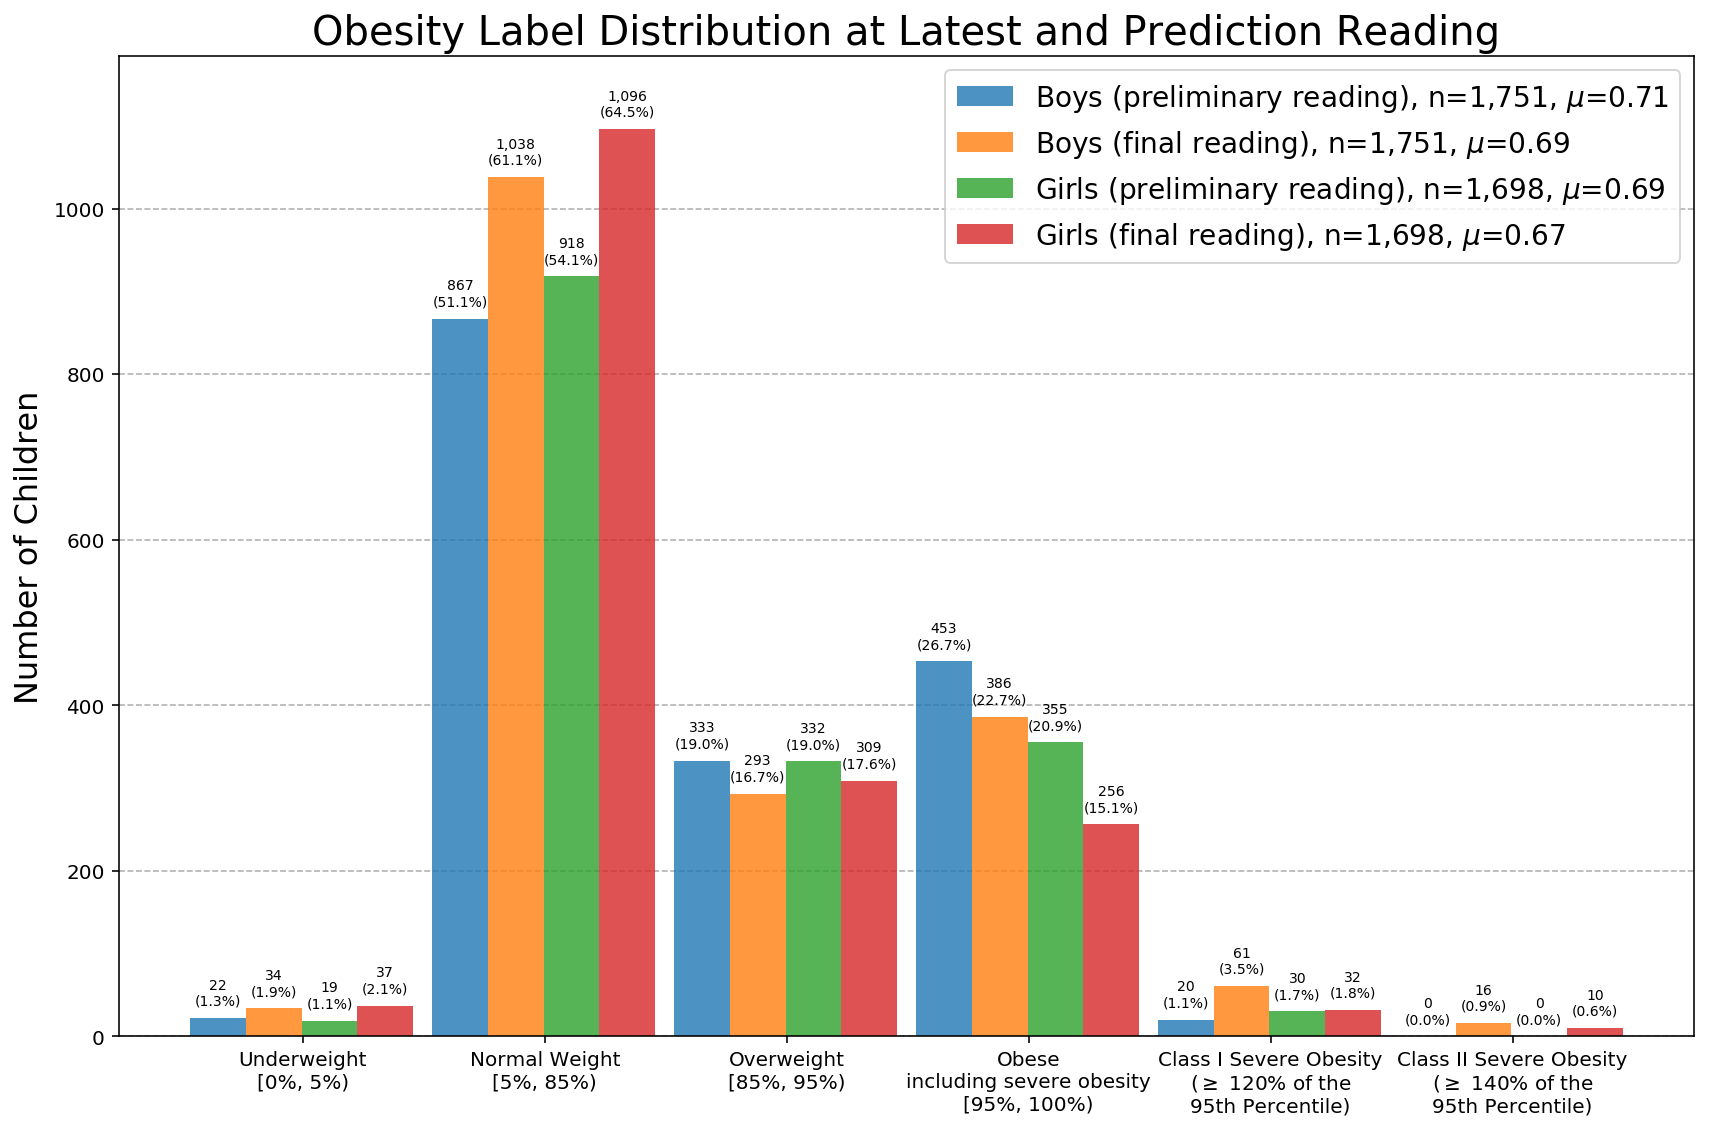

In [19]:
fig, ax = plt.subplots(figsize=(12,8))
index = np.arange(len(bins))
bar_width = 0.23
opacity = 0.8

labels = ['Underweight\n[0%, 5%)', 'Normal Weight\n[5%, 85%)', 'Overweight\n[85%, 95%)', \
         'Obese\nincluding severe obesity\n[95%, 100%)', 'Class I Severe Obesity\n($\geq$ 120% of the\n95th Percentile)', \
         'Class II Severe Obesity\n($\geq$ 140% of the\n95th Percentile)']
index = np.arange(len(labels))
bar1 = plt.bar(index, boys_nums_latest, bar_width, alpha=opacity,
               label='Boys (preliminary reading), n={0:,.0f}, $\mu$={1:,.2f}'.format(boys_pct_latest.shape[0], np.mean(boys_pct_latest)))
bar2 = plt.bar(index + bar_width, boys_nums, bar_width, alpha=opacity,
               label='Boys (final reading), n={0:,.0f}, $\mu$={1:,.2f}'.format(boys_pct_latest.shape[0], np.mean(boys_pct)))


 
bar3 = plt.bar(index + 2*bar_width, girls_nums_latest, bar_width, alpha=opacity,
               label='Girls (preliminary reading), n={0:,.0f}, $\mu$={1:,.2f}'.format(girls_pct_latest.shape[0], np.mean(girls_pct_latest)))
bar4 = plt.bar(index + 3*bar_width, girls_nums, bar_width, alpha=opacity,
               label='Girls (final reading), n={0:,.0f}, $\mu$={1:,.2f}'.format(girls_pct.shape[0], np.mean(girls_pct)))

rects = ax.patches
for i,rect in enumerate(rects):
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 5
    pct = y_value / np.count_nonzero(boys_pct) * 100 if i%2==0 else y_value / np.count_nonzero(girls_pct) * 100
    label = "{0:,.0f}\n({1:2.1f}%)".format(y_value, pct)
    plt.annotate(label, (x_value, y_value), xytext=(0, space), fontsize=7, textcoords="offset points", ha='center', va='bottom')   
    
plt.ylabel('Number of Children', fontsize=16)
plt.ylim(0,np.max([boys_nums,boys_nums_latest,girls_nums,girls_nums_latest])*1.08)
plt.title('Obesity Label Distribution at Latest and Prediction Reading', fontsize=20)
plt.xticks(index+0.35, labels)
ax.yaxis.grid(linestyle='--')
ax.set_axisbelow(True)
plt.legend(fontsize=14)
 
plt.tight_layout()
plt.savefig('../paper_figures/obestity_label_distribution_latest_target.png', dpi=120)
plt.show()

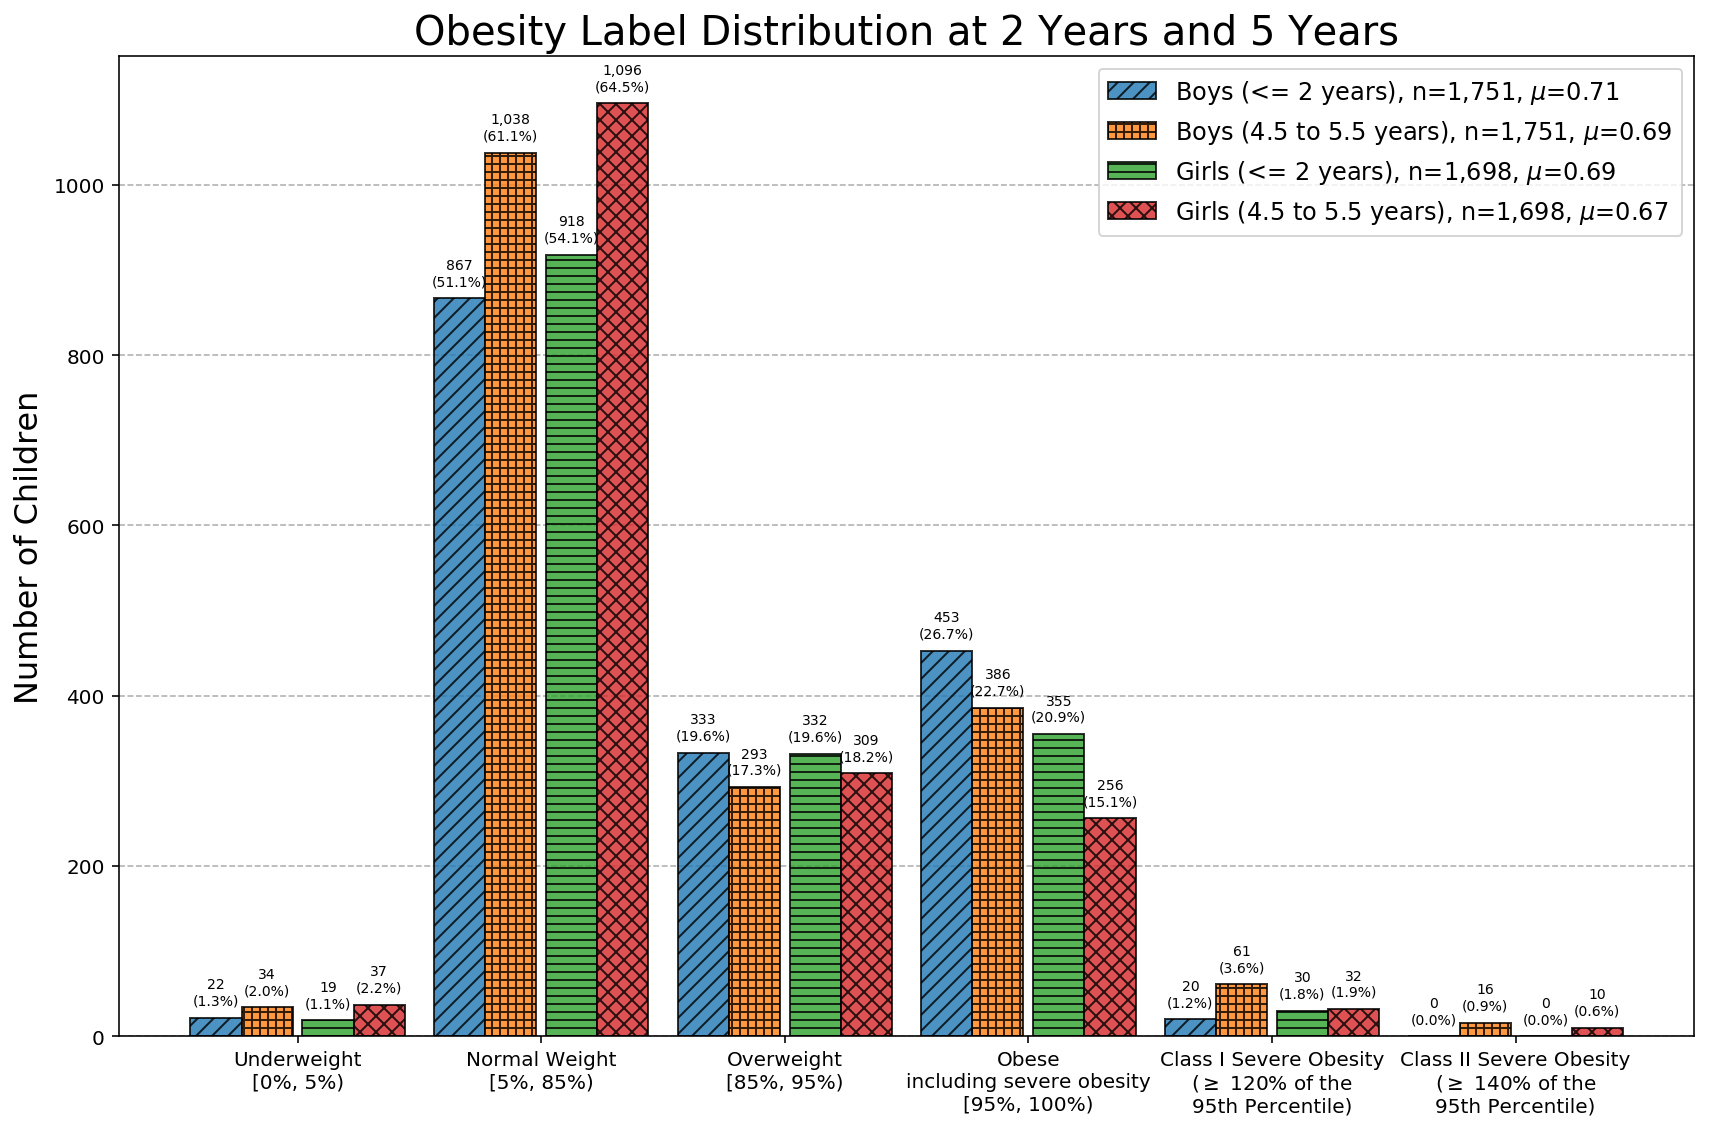

In [20]:
fig, ax = plt.subplots(figsize=(12,8))
index = np.arange(len(bins))
bar_width = 0.21
opacity = 0.8

labels = ['Underweight\n[0%, 5%)', 'Normal Weight\n[5%, 85%)', 'Overweight\n[85%, 95%)', \
         'Obese\nincluding severe obesity\n[95%, 100%)', 'Class I Severe Obesity\n($\geq$ 120% of the\n95th Percentile)', \
         'Class II Severe Obesity\n($\geq$ 140% of the\n95th Percentile)']
index = np.arange(len(labels))
bar1 = plt.bar(index, boys_nums_latest, bar_width, alpha=opacity, hatch=3*"/", edgecolor='black',
               label='Boys (<= 2 years), n={0:,.0f}, $\mu$={1:,.2f}'.format(boys_pct_latest.shape[0], np.mean(boys_pct_latest)))
bar2 = plt.bar(index + bar_width, boys_nums, bar_width, alpha=opacity, hatch=3*'+', edgecolor='black',
               label='Boys (4.5 to 5.5 years), n={0:,.0f}, $\mu$={1:,.2f}'.format(boys_pct_latest.shape[0], np.mean(boys_pct)))


 
bar3 = plt.bar(index + 0.04 + 2*bar_width, girls_nums_latest, bar_width, alpha=opacity, hatch=3*'-', edgecolor='black',
               label='Girls (<= 2 years), n={0:,.0f}, $\mu$={1:,.2f}'.format(girls_pct_latest.shape[0], np.mean(girls_pct_latest)))
bar4 = plt.bar(index + 0.04 + 3*bar_width, girls_nums, bar_width, alpha=opacity, hatch=3*'x', edgecolor='black',
               label='Girls (4.5 to 5.5 years), n={0:,.0f}, $\mu$={1:,.2f}'.format(girls_pct.shape[0], np.mean(girls_pct)))


# for ix, (b, g) in enumerate(zip(boys_nums, girls_nums)):
#     plt.text()
rects = ax.patches
for rect in rects:
    # Get X and Y placement of label from rect.
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 5
    pct = y_value / np.count_nonzero(boys_pct) * 100 if i%2==0 else y_value / np.count_nonzero(girls_pct) * 100
    label = "{0:,.0f}\n({1:2.1f}%)".format(y_value, pct)
    plt.annotate(label, (x_value, y_value), xytext=(0, space), fontsize=7, textcoords="offset points", ha='center', va='bottom')   
    
plt.ylabel('Number of Children', fontsize=16)
plt.title('Obesity Label Distribution at 2 Years and 5 Years', fontsize=20)
plt.xticks(index+0.335, labels)
ax.yaxis.grid(linestyle='--')
ax.set_axisbelow(True)
plt.legend(fontsize=12)
 
plt.tight_layout()
plt.savefig('../paper_figures/obestity_label_distribution_latest_target_hatches.png', dpi=120)
plt.show()

# Single Feature Models

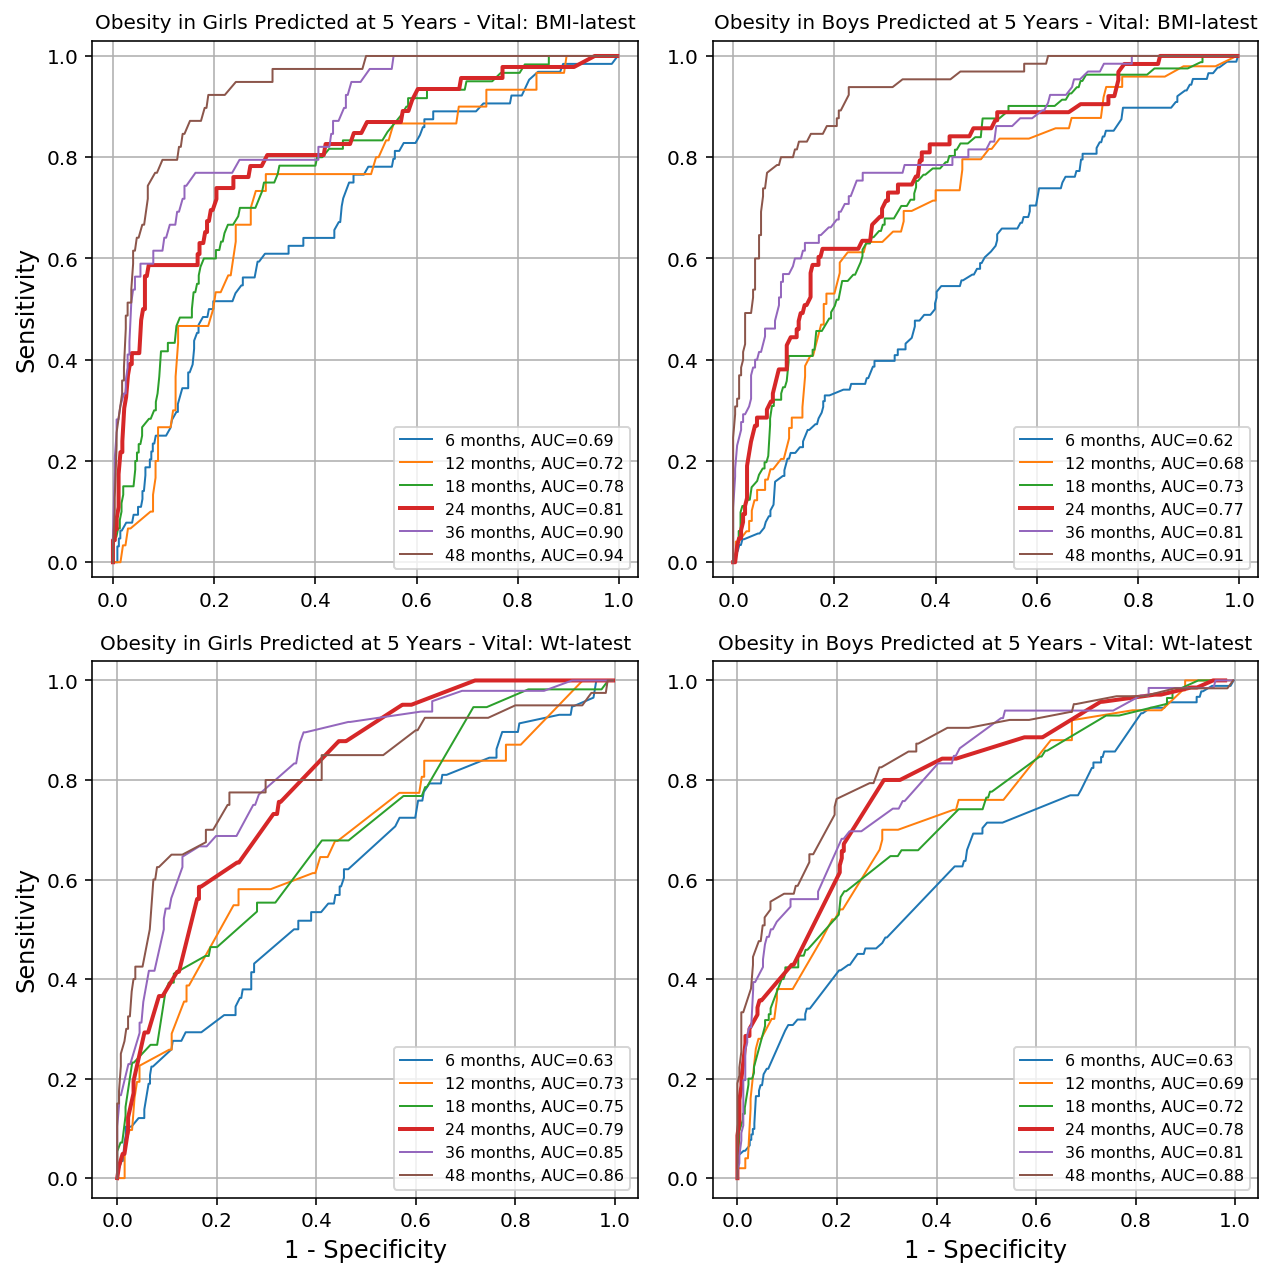

In [21]:
fig = plt.figure(figsize=(9,9))
filters = [('BMI','girls'),('BMI','boys'),('Wt','girls'),('Wt','boys')]
for i, f in enumerate(filters):
    ax = plt.subplot(221+i)
    for ix in range(len(prec_total)):
        if all(x.lower() in titles_total[ix].lower() for x in f) and all(x not in titles_total[ix].lower() for x in ('randomforest','gradientboost','no_maternal')):
            w = 2 if '@ 24' in titles_total[ix] else 1
            s = titles_total[ix]
            start = s.find('@')+2
            end = s.find('months', start)
            lab = s[start:end] + ' months, AUC={:0.2f}'.format(auc_list[ix][0])
            plt.plot(1- np.array(spec_total[ix]), np.array(recall_total[ix]), linewidth=w, label=lab)

    plt.legend(fontsize=8, loc='lower right')
    if i == 0:
        plt.ylabel('Sensitivity', fontsize=12)
    if i == 2:
        plt.ylabel('Sensitivity', fontsize=12)
        plt.xlabel('1 - Specificity', fontsize=12)
    if i == 3:
        plt.xlabel('1 - Specificity', fontsize=12)
    plt.axis('equal')
    start = s.find(' - ', s.find(' - ') + 3) + 3
    end = s.find(' @', start)
    plt.title('Obesity in ' + f[1].title() + ' Predicted at 5 Years - ' + s[start:end], fontsize=10)
    plt.grid(True)
    plt.tight_layout()

fig.tight_layout()
fig.savefig('../paper_figures/single_feature_roc.png', dpi=120)
plt.show()

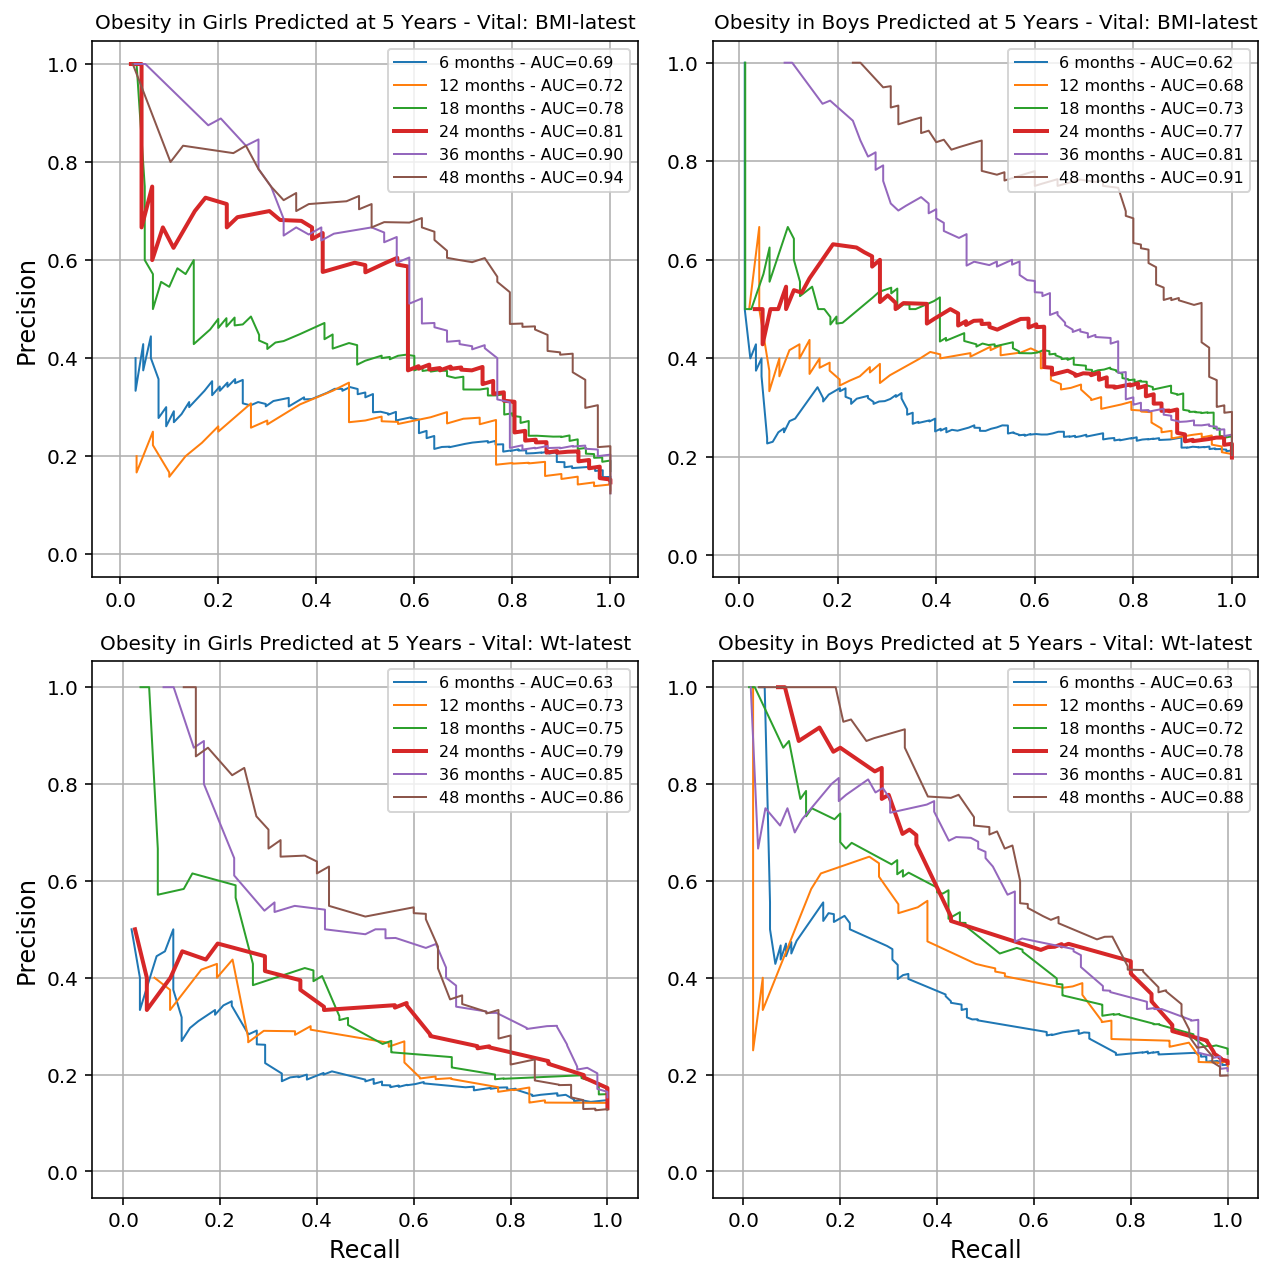

In [22]:
fig = plt.figure(figsize=(9,9))
filters = [('BMI','girls'),('BMI','boys'),('Wt','girls'),('Wt','boys')]
for i, f in enumerate(filters):
    ax = plt.subplot(221+i)
    for ix in range(len(prec_total)):
        if all(x.lower() in titles_total[ix].lower() for x in f) and all(x not in titles_total[ix].lower() for x in ('randomforest','gradientboost','no_maternal')):
            w = 2 if '@ 24' in titles_total[ix] else 1
            s = titles_total[ix]
            start = s.find('@')+2
            end = s.find('months', start)
            lab = s[start:end] + ' months - AUC={:0.2f}'.format(auc_list[ix][0])
            index = 1 + np.max(list(set([ix for ix,x in enumerate(recall_total[ix]) if x == 0]) & set([ix for ix,x in enumerate(prec_total[ix]) if x == 0])))
            ax.plot(recall_total[ix][index:], prec_total[ix][index:], linewidth=w, label=lab)
            ax.scatter([0,1],[0,1],alpha=0)
    plt.legend(fontsize=8, loc='upper right')
    if i == 0:
        plt.ylabel('Precision', fontsize=12)
    if i == 2:
        plt.ylabel('Precision', fontsize=12)
        plt.xlabel('Recall', fontsize=12)
    if i == 3:
        plt.xlabel('Recall', fontsize=12)
    plt.axis('equal')
    start = s.find(' - ', s.find(' - ') + 3) + 3
    end = s.find(' @', start)
    plt.title('Obesity in ' + f[1].title() + ' Predicted at 5 Years - ' + s[start:end], fontsize=10)
    plt.grid(True)
    plt.tight_layout()

fig.tight_layout()
fig.savefig('../paper_figures/single_feature_pr.png', dpi=120)
plt.show()

# Get the best performing models

In [23]:
df_list = []
headers=['ix','title','auc','auc ste']
for ix,(auc,title) in enumerate(zip(auc_list,titles_total)):
    df_list.append([ix,title,auc[0],auc[1]])

df = pd.DataFrame(df_list, columns=headers)
top_ix = []
for m in ['@ 6months','@ 12months','@ 18months','@ 24months','@ 36months','@ 48months']:
    for g in ['boys','girls']:
        filtered = df[(df.title.str.contains(g)) & (df.title.str.contains(m)) & (~df.title.str.contains('no_maternal') & (df.title.str.contains('w/o exclusions')))].sort_values(by='auc', axis=0, ascending=False)
        print(filtered.head(3))
        top_ix.append([g,m,filtered.iloc[0,0]])

    ix                                              title       auc   auc ste
21  21  boys maternal w/o exclusions - model: randomfo...  0.642392  0.018267
5    5  boys maternal w/o exclusions - model: lasso@ 6...  0.633844  0.016899
37  37  boys maternal w/o exclusions - model: gradient...  0.630358  0.015649
    ix                                              title       auc   auc ste
13  13  girls maternal w/o exclusions - model: lasso@ ...  0.692385  0.020549
29  29  girls maternal w/o exclusions - model: randomf...  0.677942  0.015822
45  45  girls maternal w/o exclusions - model: gradien...  0.669962  0.017309
    ix                                              title       auc   auc ste
85  85  boys maternal w/o exclusions - model: gradient...  0.680082  0.014816
69  69  boys maternal w/o exclusions - model: randomfo...  0.672767  0.011746
53  53  boys maternal w/o exclusions - model: lasso@ 1...  0.670870  0.010762
    ix                                              title       

# Top Performing Models at Each Age Prediction

In [24]:
top_ix

[['boys', '@ 6months', 21],
 ['girls', '@ 6months', 13],
 ['boys', '@ 12months', 85],
 ['girls', '@ 12months', 77],
 ['boys', '@ 18months', 133],
 ['girls', '@ 18months', 125],
 ['boys', '@ 24months', 181],
 ['girls', '@ 24months', 189],
 ['boys', '@ 36months', 197],
 ['girls', '@ 36months', 205],
 ['boys', '@ 48months', 277],
 ['girls', '@ 48months', 253]]

In [25]:
variations = ['no inclusion', 'inclusion', 'mod. inclusion']
base_ppv_comp_dict = {'whole':{'no inclusion':0, 'inclusion':0, 'mod. inclusion':0},
                 'boys':{'no inclusion':0, 'inclusion':0, 'mod. inclusion':0},
                 'girls':{'no inclusion':0, 'inclusion':0, 'mod. inclusion':0}}
for lab,filt in [('whole',np.array([True]*x1.shape[0])), ('boys',ix_filter_boys), ('girls',ix_filter_girls)]:
    for var in variations:        
        if var == 'no inclusion':
            inc_ix = np.array([True]*x1.shape[0])
        elif var == 'inclusion':
            inc_ix = (x1[:,feature_headers.index('MatDeliveryAge')]>=18) & \
                (x1[:,feature_headers.index('Maternal-ethnicity:HISPANIC/LATINO')]>0) & \
                (x1[:,feature_headers.index('Maternal Diagnosis:9ccs195:Ot compl bir')]==0)
        elif var == 'mod. inclusion':
            inc_ix = (x1[:,feature_headers.index('MatDeliveryAge')]>=18) & \
                (x1[:,feature_headers.index('Maternal Diagnosis:9ccs195:Ot compl bir')]==0)

        to_filter = np.array([inc and f for inc,f in zip(inc_ix,filt)])
        x = x1[to_filter,:]
        y = y1[to_filter]
        ylabel = y1label[to_filter]
        
        n = to_filter.sum()
        pos_n = np.array([ylab==1 for ylab in ylabel]).sum()
        ppv = pos_n/n
        base_ppv_comp_dict[lab][var] = ppv
        print(lab+' - '+var+'   total: {0:,d},  pos: {1:,d},  ppv: {2:2.2f}%'.format(n, pos_n, ppv*100))


# titles = [titles_total[t[2]]+' - '+var for t in top_ix for var in variations]
# test_sets = [('boys6',boys6),('girls6',girls6),('boys12',boys12),('girls12',girls12),('boys18',boys18),('girls18',girls18),('boys24',boys24),('girls24',girls24),('boys36',boys36),('girls36',girls36),('boys48',boys48),('girls48',girls48)]
# print('----------------------------')
# for test,top in zip(test_sets, top_ix):
#     data = test[1]
#     x1_inclusion = x1[data['ix2']][data['modeling_ix']][data['test_ix']]
#     for var in variations:        
#         if var == 'original':
#             inc_ix = np.array([True]*x1_inclusion.shape[0])
#         elif var == 'inclusion':
#             inc_ix = (x1_inclusion[:,feature_headers.index('MatDeliveryAge')]>=18) & \
#                 (x1_inclusion[:,feature_headers.index('Maternal-ethnicity:HISPANIC/LATINO')]>0) & \
#                 (x1_inclusion[:,feature_headers.index('Maternal Diagnosis:9ccs195:Ot compl bir')]==0)
#         elif var == 'mod. inclusion':
#             inc_ix = (x1_inclusion[:,feature_headers.index('MatDeliveryAge')]>=18) & \
#                 (x1_inclusion[:,feature_headers.index('Maternal Diagnosis:9ccs195:Ot compl bir')]==0)
        
#         if all(inc_ix == False):
#             print('No valid patients')
#             prec_list = [0,0,0,0,0]
#             recall_list = [0,0,0,0,0]
#             spec_list = [0,0,0,0,0]
#             continue
            
#         xtest = data['x'][data['modeling_ix']][data['test_ix']][inc_ix,:]
#         ytest = data['y'][data['modeling_ix']][data['test_ix']][inc_ix]
#         ytestlabel = data['ylabel'][data['modeling_ix']][data['test_ix']][inc_ix]
#         mrns = data['mrns'][data['modeling_ix']][data['test_ix']][inc_ix]
#         headers = data['features']
#         model = model_list[top[2]]
#         print(titles_total[top[2]], var, ' - ', inc_ix.sum(), np.array([y==1 for y in ytestlabel]).sum(), '{0:2.4f}'.format(np.array([y==1 for y in ytestlabel]).sum()/inc_ix.sum()))


whole - no inclusion   total: 52,945,  pos: 2,278,  ppv: 4.30%
whole - inclusion   total: 1,536,  pos: 282,  ppv: 18.36%
whole - mod. inclusion   total: 1,881,  pos: 327,  ppv: 17.38%
boys - no inclusion   total: 1,751,  pos: 386,  ppv: 22.04%
boys - inclusion   total: 736,  pos: 165,  ppv: 22.42%
boys - mod. inclusion   total: 935,  pos: 197,  ppv: 21.07%
girls - no inclusion   total: 1,698,  pos: 256,  ppv: 15.08%
girls - inclusion   total: 799,  pos: 117,  ppv: 14.64%
girls - mod. inclusion   total: 945,  pos: 130,  ppv: 13.76%


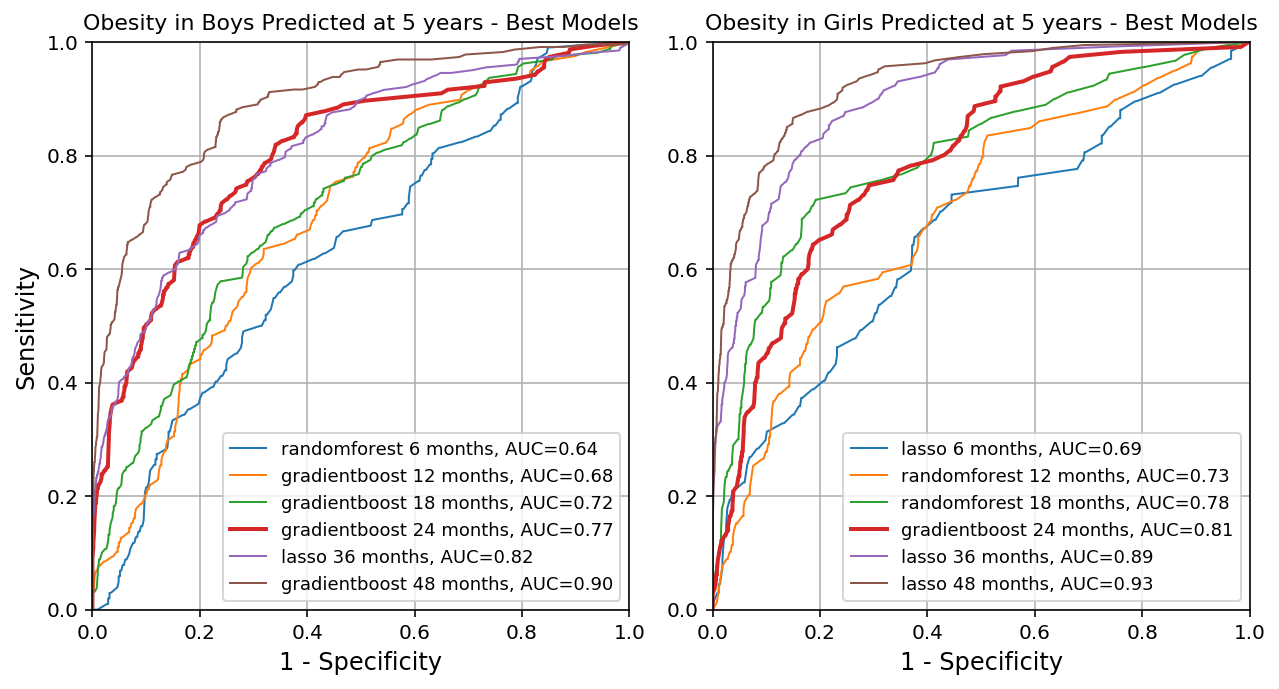

In [26]:
plt.figure(figsize=(9,9))
indices = {'boys': [l[2] for l in top_ix if l[0]=='boys'], 'girls': [l[2] for l in top_ix if l[0]=='girls']}
plots = int(str(int(math.ceil(len(filters)/2))) + str(21))
for i, key in enumerate(indices):
    ax = plt.subplot(plots+i)
    if i == 0:
        plt.ylabel('Sensitivity', fontsize=12)
    for val in indices[key]:
        specificity = spec_total[val]
        recall = recall_total[val]
        s = titles_total[val]
        start = s.find('el:')+4
        end = s.find('months', start)
        lab = s[start:end] + ' months, AUC={:0.2f}'.format(auc_list[val][0])
        lab = lab.replace('@','')
        
        w = 2 if '@ 24' in titles_total[val] else 1
        plt.plot(1 - np.array(specificity), np.array(recall), linewidth=w, label=lab)
        
    plt.legend(fontsize = 9)
    plt.xlim((0,1))
    plt.ylim((0,1))
#     plt.axis('equal')
    plt.grid(True)
    plt.tight_layout()
    plt.xlabel('1 - Specificity', fontsize=12)
    plt.title('Obesity in ' + key.title() + ' Predicted at 5 years - Best Models', fontsize=11)

plt.tight_layout()
plt.savefig('../paper_figures/best_models_roc.png', bbox_inches='tight', dpi=180)
plt.show()

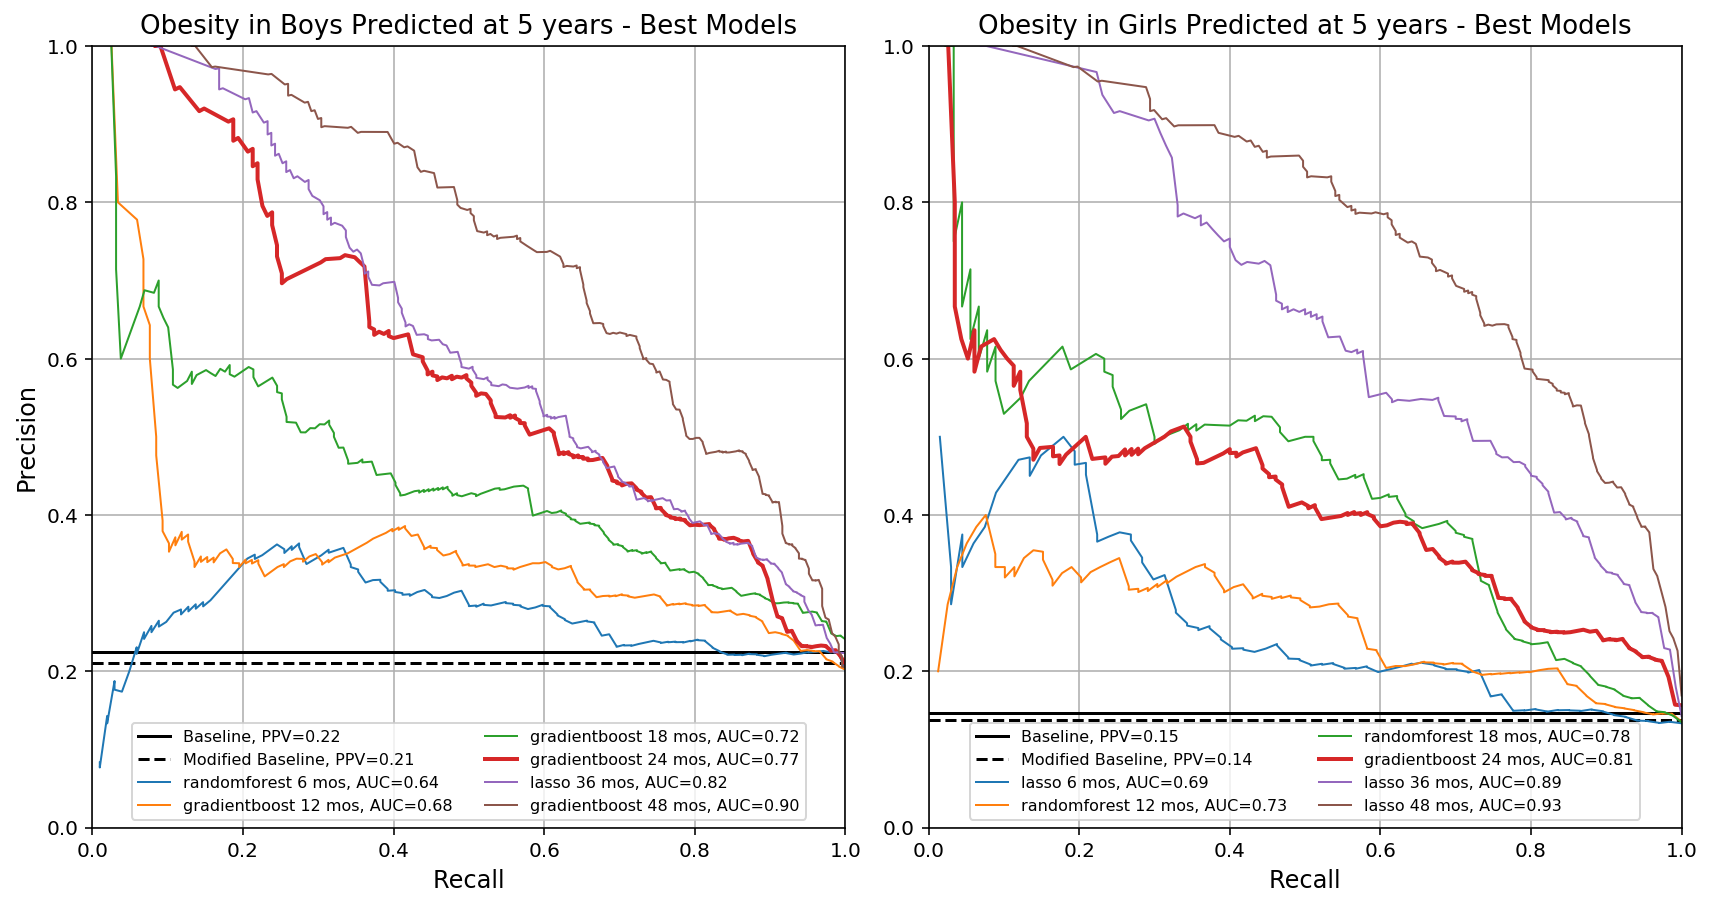

In [27]:
plt.figure(figsize=(12,12))
indices = {'boys': [l[2] for l in top_ix if l[0]=='boys'], 'girls': [l[2] for l in top_ix if l[0]=='girls']}
plots = int(str(int(math.ceil(len(filters)/2))) + str(21))
for i, key in enumerate(indices):
    ax = plt.subplot(plots+i)
    plt.scatter([0,1],[0,1], alpha=0)
    plt.axhline(base_ppv_comp_dict[key]['inclusion'], color='k', label='Baseline, PPV={0:0.2f}'.format(base_ppv_comp_dict[key]['inclusion']))
    plt.axhline(base_ppv_comp_dict[key]['mod. inclusion'], linestyle='--', color='k', label='Modified Baseline, PPV={0:0.2f}'.format(base_ppv_comp_dict[key]['mod. inclusion']))
    if i == 0:
        plt.ylabel('Precision', fontsize=12)
    for val in indices[key]:
        precision = prec_total[val]
        recall = recall_total[val]
        s = titles_total[val]
        start = s.find('el:')+4
        end = s.find('months', start)
        lab = s[start:end] + ' mos, AUC={:0.2f}'.format(auc_list[val][0])
        lab = lab.replace('@','')
        
        w = 2 if '@ 24' in titles_total[val] else 1
        index = 1 + np.max(list(set([ix for ix,x in enumerate(recall) if x == 0]) & set([ix for ix,x in enumerate(precision) if x == 0])))
        plt.plot(np.array(recall[index:]), np.array(precision[index:]), linewidth=w, label=lab)
        
    plt.legend(loc='lower center', fontsize=8, ncol=2)
    plt.xlim((0,1))
    plt.ylim((0,1))
#     plt.axis('equal')
    plt.grid(True)
    plt.tight_layout()
    plt.xlabel('Recall', fontsize=12)
    plt.title('Obesity in ' + key.title() + ' Predicted at 5 years - Best Models', fontsize=13)

plt.tight_layout()
plt.savefig('../paper_figures/best_models_pr.png', bbox_inches='tight', dpi=180)
plt.show()

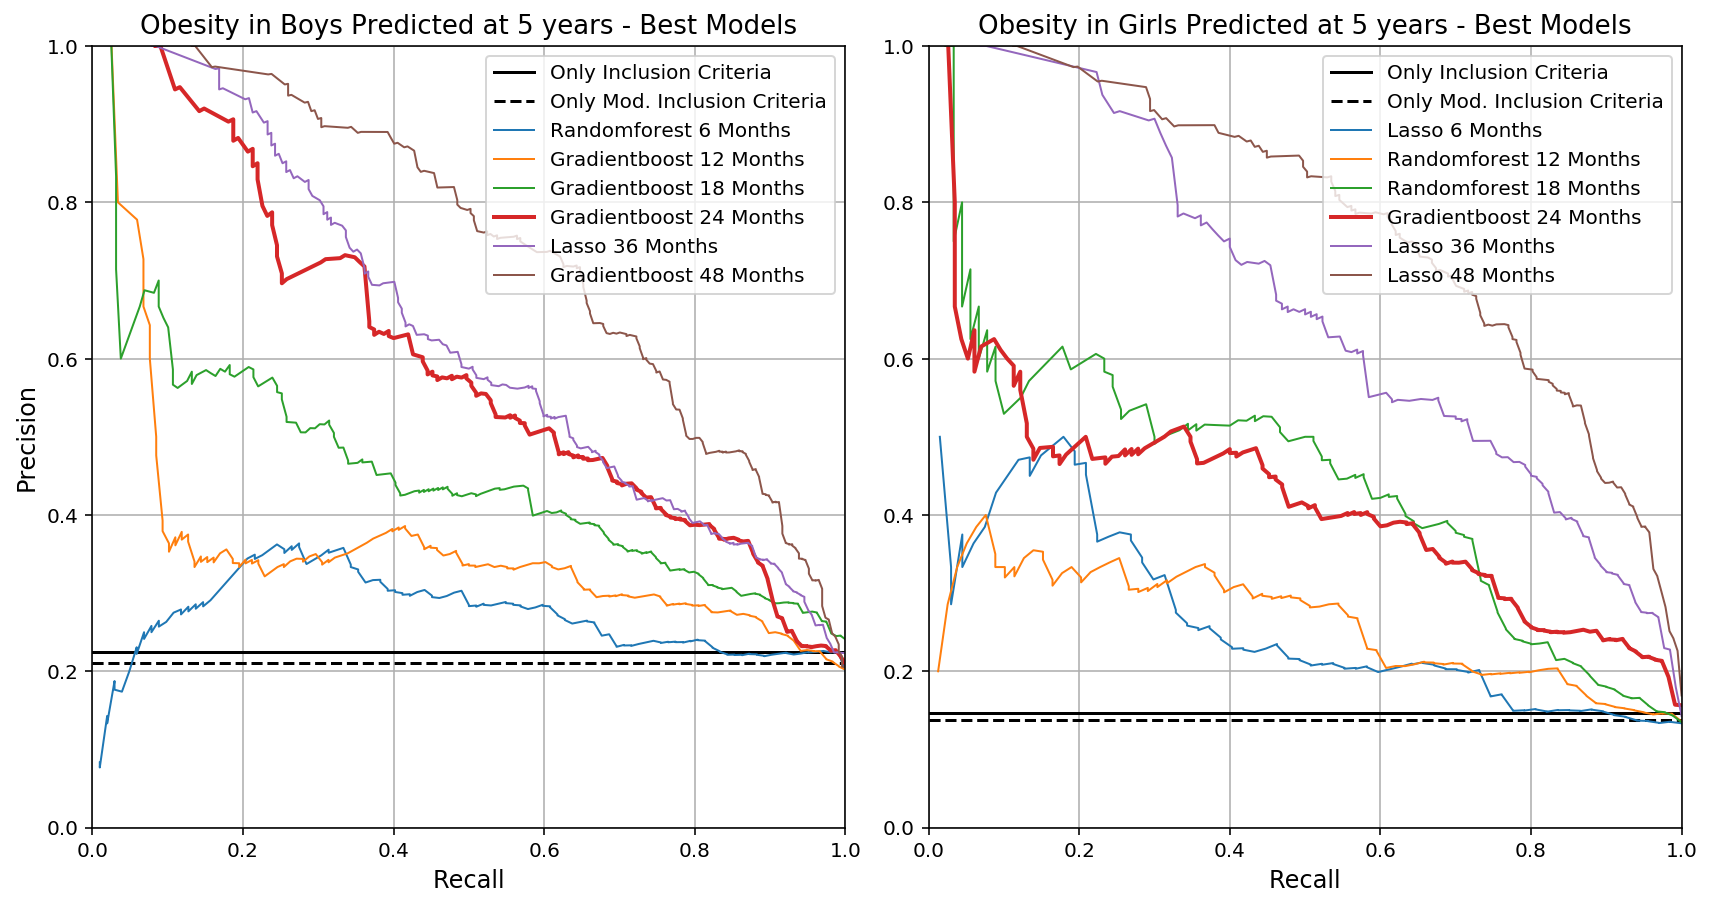

In [28]:
plt.figure(figsize=(12,12))
indices = {'boys': [l[2] for l in top_ix if l[0]=='boys'], 'girls': [l[2] for l in top_ix if l[0]=='girls']}
plots = int(str(int(math.ceil(len(filters)/2))) + str(21))
for i, key in enumerate(indices):
    ax = plt.subplot(plots+i)
    plt.scatter([0,1],[0,1], alpha=0)
    plt.axhline(base_ppv_comp_dict[key]['inclusion'], color='k', label='Only Inclusion Criteria'.format(base_ppv_comp_dict[key]['inclusion']))
    plt.axhline(base_ppv_comp_dict[key]['mod. inclusion'], linestyle='--', color='k', label='Only Mod. Inclusion Criteria'.format(base_ppv_comp_dict[key]['mod. inclusion']))
    if i == 0:
        plt.ylabel('Precision', fontsize=12)
    for val in indices[key]:
        precision = prec_total[val]
        recall = recall_total[val]
        s = titles_total[val]
        start = s.find('el:')+4
        end = s.find('months', start)
#         lab = s[start:end] + ' months, AUC={:0.2f}'.format(auc_list[val][0])
        lab = s[start:end] + ' months'
        lab = lab.replace('@','').title()
        
        w = 2 if '@ 24' in titles_total[val] else 1
        index = 1 + np.max(list(set([ix for ix,x in enumerate(recall) if x == 0]) & set([ix for ix,x in enumerate(precision) if x == 0])))
        plt.plot(np.array(recall[index:]), np.array(precision[index:]), linewidth=w, label=lab)
        
    plt.legend(loc='upper right', fontsize=10)
    plt.xlim((0,1))
    plt.ylim((0,1))
#     plt.axis('equal')
    plt.grid(True)
    plt.tight_layout()
    plt.xlabel('Recall', fontsize=12)
    plt.title('Obesity in ' + key.title() + ' Predicted at 5 years - Best Models', fontsize=13)

plt.tight_layout()
# plt.savefig(newdir+'/Pediatric_Girls_ROC.png', dpi=300)
plt.show()

# Updates post meeting

In [29]:
df_list = []
headers=['ix','title','auc','auc ste']
for ix,(auc,title) in enumerate(zip(auc_list,titles_total)):
    df_list.append([ix,title,auc[0],auc[1]])

df = pd.DataFrame(df_list, columns=headers)
top_ix = [] # format: ['gender','age','index',model label,title, auc, auc_low, auc_high,specificity,precision,recall]
m = '@ 24'
models_to_plot = {
    'boys':{
        'bmi':{'precision':[],'recall':[],'specificity':[],'auc':0,'auc_low':0,'auc_high':0,'ix':0,'title':'','m':':'},
        'wt':{'precision':[],'recall':[],'specificity':[],'auc':0,'auc_low':0,'auc_high':0,'ix':0,'title':'','m':'--'},
        'best':{'precision':[],'recall':[],'specificity':[],'auc':0,'auc_low':0,'auc_high':0,'ix':0,'title':'','m':'-'}
    },
    'girls':{
        'bmi':{'precision':[],'recall':[],'specificity':[],'auc':0,'auc_low':0,'auc_high':0,'ix':0,'title':'','m':':'},
        'wt':{'precision':[],'recall':[],'specificity':[],'auc':0,'auc_low':0,'auc_high':0,'ix':0,'title':'','m':'--'},
        'best':{'precision':[],'recall':[],'specificity':[],'auc':0,'auc_low':0,'auc_high':0,'ix':0,'title':'','m':'-'}
    }
}
for g in ['boys','girls']:
    for i,t in enumerate(titles_total):
        if all(x in t for x in ('Vital','lasso',m,g)):
            model = 'bmi' if 'BMI' in t else 'wt'
            models_to_plot[g][model]['auc'] = auc_list[i][0]
            models_to_plot[g][model]['auc_low'] = auc_list[i][0]-auc_list[i][1]
            models_to_plot[g][model]['auc_high'] = auc_list[i][0]+auc_list[i][1]
            models_to_plot[g][model]['ix'] = i
            models_to_plot[g][model]['precision'] = prec_total[i]
            models_to_plot[g][model]['recall'] = recall_total[i]
            models_to_plot[g][model]['specificity'] = spec_total[i]
            models_to_plot[g][model]['title'] = t
#             top_ix.append([g,m,i,t,auc_list[i][0],auc_list[i][0]-auc_list[i][1],auc_list[i][0]+auc_list[i][1],spec_total[i],prec_total[i],recall_total[i]])
# for m in ['@ 6months','@ 12months','@ 18months','@ 24months','@ 36months','@ 48months']:
model='best'
for g in ['boys','girls']:
    filtered = df[(df.title.str.contains(g)) & (df.title.str.contains(m)) & (~df.title.str.contains('no_maternal') & (df.title.str.contains('w/o exclusions')))].sort_values(by='auc', axis=0, ascending=False)
    print(filtered.head(3))
    models_to_plot[g][model]['auc'] = filtered.iloc[0,2]
    models_to_plot[g][model]['auc_low'] = filtered.iloc[0,2]-filtered.iloc[0,3]
    models_to_plot[g][model]['auc_high'] = filtered.iloc[0,2]+filtered.iloc[0,3]
    models_to_plot[g][model]['ix'] = filtered.iloc[0,0]
    models_to_plot[g][model]['precision'] = prec_total[filtered.iloc[0,0]]
    models_to_plot[g][model]['recall'] = recall_total[filtered.iloc[0,0]]
    models_to_plot[g][model]['specificity'] = spec_total[filtered.iloc[0,0]]
    models_to_plot[g][model]['title'] = filtered.iloc[0,1]
#     top_ix.append([g,m,filtered.iloc[0,0],'best',filtered.iloc[0,1],filtered.iloc[0,2],filtered.iloc[0,2]-filtered.iloc[0,3],filtered.iloc[0,2]+filtered.iloc[0,3],spec_total[filtered.iloc[0,0]],prec_total[filtered.iloc[0,0]],recall_total[filtered.iloc[0,0]]])


      ix                                              title       auc  \
181  181  boys maternal w/o exclusions - model: gradient...  0.767275   
149  149  boys maternal w/o exclusions - model: lasso@ 2...  0.758447   
165  165  boys maternal w/o exclusions - model: randomfo...  0.757014   

      auc ste  
181  0.011424  
149  0.009043  
165  0.011258  
      ix                                              title       auc  \
189  189  girls maternal w/o exclusions - model: gradien...  0.806009   
157  157  girls maternal w/o exclusions - model: lasso@ ...  0.805645   
173  173  girls maternal w/o exclusions - model: randomf...  0.803393   

      auc ste  
189  0.010217  
157  0.009200  
173  0.005738  


In [30]:
[*models_to_plot['boys']]

['bmi', 'wt', 'best']

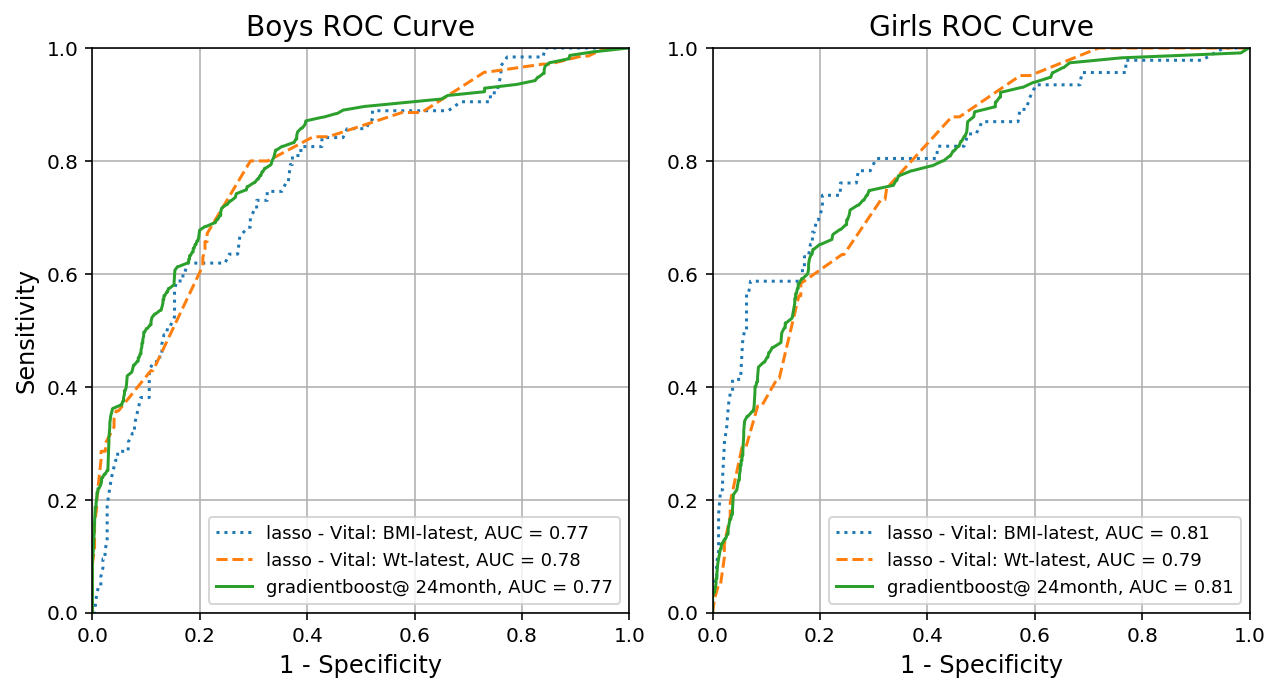

In [31]:
fig = plt.figure(figsize=(9,9))
# top_ix format: ['gender','age','index',title, auc, auc_low, auc_high,specificity,precision,recall]
for i,comb in enumerate(['boys','girls']):
    ax = plt.subplot(221+i)
    title = comb.title() + ' ROC Curve'
    plt.title(title, fontsize=14)
    for k in models_to_plot[comb]:
        w = 1.5
        s = models_to_plot[comb][k]['title']
        start = s.find('el:')+4
        end = s.find(' @', start)
        lab = s[start:end] + ', AUC = {0:0.2f}'.format(models_to_plot[comb][k]['auc'],models_to_plot[comb][k]['auc_low'],models_to_plot[comb][k]['auc_high'])
        plt.plot(1-np.array(models_to_plot[comb][k]['specificity']), np.array(models_to_plot[comb][k]['recall']), linestyle=models_to_plot[comb][k]['m'], linewidth=w, label=lab)
    plt.grid(True)
    plt.xlim((0,1))
    plt.ylim((0,1))
    plt.legend(fontsize=9, loc='lower right')
    if i == 0:
        plt.ylabel('Sensitivity', fontsize=12)
    plt.xlabel('1 - Specificity', fontsize=12)
    plt.tight_layout()
            
fig.savefig('../paper_figures/AUC_ROC_comparison.png', bbox_inches='tight', dpi=240)
plt.show()

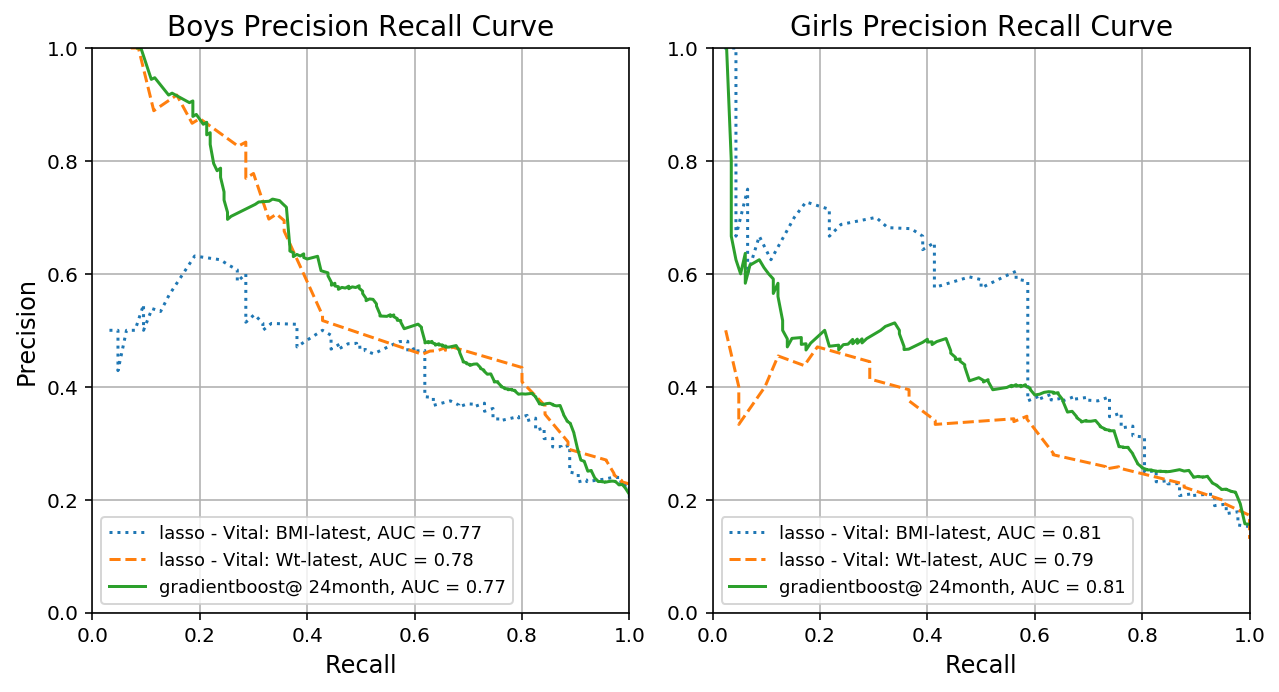

In [32]:
fig = plt.figure(figsize=(9,9))
# top_ix format: ['gender','age','index',title, auc, auc_low, auc_high,specificity,precision,recall]
for i,comb in enumerate(['boys','girls']):
    ax = plt.subplot(221+i)
    title = comb.title() + ' Precision Recall Curve'
    plt.title(title, fontsize=14)
    for k in models_to_plot[comb]:
        w = 1.5
        s = models_to_plot[comb][k]['title']
        start = s.find('el:')+4
        end = s.find(' @', start)
        lab = s[start:end] + ', AUC = {0:0.2f}'.format(models_to_plot[comb][k]['auc'],models_to_plot[comb][k]['auc_low'],models_to_plot[comb][k]['auc_high'])
        index = 1 + np.max(list(set([ix for ix,x in enumerate(models_to_plot[comb][k]['recall']) if x == 0]) & set([ix for ix,x in enumerate(models_to_plot[comb][k]['precision']) if x == 0])))
        plt.plot(models_to_plot[comb][k]['recall'][index:], np.array(models_to_plot[comb][k]['precision'][index:]), linestyle=models_to_plot[comb][k]['m'], linewidth=w, label=lab)
    plt.grid(True)
    plt.xlim((0,1))
    plt.ylim((0,1))
    plt.legend(fontsize=9, loc='lower left')
    if i%2 == 0:
        plt.ylabel('Precision', fontsize=12)
    plt.xlabel('Recall', fontsize=12)
    plt.tight_layout()
            
fig.savefig('../paper_figures/precision_recall_comparison.png', bbox_inches='tight', dpi=240)
plt.show()